In [342]:
!pip install pandas_ta
!pip install keras-tuner


In [343]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
#data = yf.download(tickers = '^RUI', start = '2012-03-11',end = '2022-07-10')
import pandas as pd


# Read the CSV file into a pandas DataFrame
data = pd.read_csv("MSFT_2006-01-01_to_2018-01-01.csv")
print(data.head(10))




         Date   Open   High    Low  Close     Volume  Name
0  2006-01-03  26.25  27.00  26.10  26.84   79974418  MSFT
1  2006-01-04  26.77  27.08  26.77  26.97   57975661  MSFT
2  2006-01-05  26.96  27.13  26.91  26.99   48247610  MSFT
3  2006-01-06  26.89  27.00  26.49  26.91  100969092  MSFT
4  2006-01-09  26.93  27.07  26.76  26.86   55627836  MSFT
5  2006-01-10  26.65  27.02  26.59  27.00   64924946  MSFT
6  2006-01-11  27.01  27.39  26.90  27.29   70123544  MSFT
7  2006-01-12  27.25  27.26  26.97  27.14   45994725  MSFT
8  2006-01-13  27.03  27.25  27.01  27.19   41449046  MSFT
9  2006-01-17  26.90  27.19  26.90  26.99   58574807  MSFT


In [344]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)

data['Target'] = data.Close-data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data.Close.shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Volume', 'Close', 'Date','index','Name'], axis=1, inplace=True)
print(data.head(10))

    Open   High    Low        RSI       EMAF       EMAM       EMAS  Target  \
0  24.28  24.48  24.19  58.053286  23.779935  24.372858  25.247867   -0.05   
1  24.39  24.52  24.20  59.376280  23.833274  24.372207  25.235842   -0.05   
2  24.49  24.64  24.34  60.488935  23.891058  24.373550  25.225301    0.09   
3  24.37  24.60  24.34  60.719477  23.945243  24.375262  25.215165    0.00   
4  24.43  24.45  24.20  60.155370  23.991410  24.376346  25.204765    0.01   
5  24.52  24.60  24.35  61.434955  24.042704  24.379388  25.195828    0.07   
6  24.55  24.65  24.44  62.593343  24.097685  24.384153  25.188201    0.09   
7  24.61  24.73  24.47  63.633671  24.155048  24.390407  25.181735    0.00   
8  24.70  24.75  24.61  63.633671  24.206948  24.396538  25.175354    0.74   
9  25.05  25.80  24.98  74.657524  24.357715  24.424131  25.183495    0.46   

   TargetClass  TargetNextClose  
0            0            24.34  
1            0            24.44  
2            1            24.46  
3    

In [345]:
data_set = data.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)

data_set.head(20)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

,Open,High,Low,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,24.28,24.48,24.19,58.053286,23.779935,24.372858,25.247867,-0.05,0,24.34
1,24.39,24.52,24.20,59.376280,23.833274,24.372207,25.235842,-0.05,0,24.44
2,24.49,24.64,24.34,60.488935,23.891058,24.373550,25.225301,0.09,1,24.46
3,24.37,24.60,24.34,60.719477,23.945243,24.375262,25.215165,0.00,0,24.43
4,24.43,24.45,24.20,60.155370,23.991410,24.376346,25.204765,0.01,1,24.53
5,24.52,24.60,24.35,61.434955,24.042704,24.379388,25.195828,0.07,1,24.62
6,24.55,24.65,24.44,62.593343,24.097685,24.384153,25.188201,0.09,1,24.70
7,24.61,24.73,24.47,63.633671,24.155048,24.390407,25.181735,0.00,0,24.70
8,24.70,24.75,24.61,63.633671,24.206948,24.396538,25.175354,0.74,1,25.79
9,25.05,25.80,24.98,74.657524,24.357715,24.424131,25.183495,0.46,1,26.12


In [346]:
#Target column Categories
#y =[1 if data.Open[i]>data.Close[i] else 0 for i in range(0, len(data))]
#yi = [data.Open[i]-data.Close[i] for i in range(0, len(data))]
#print(yi)
#print(len(yi))

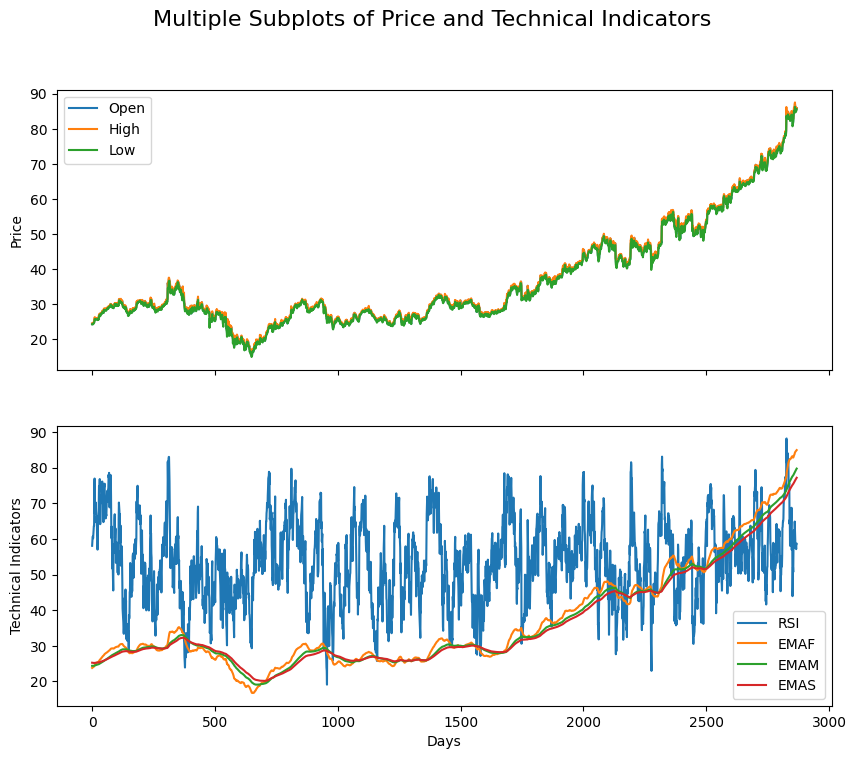

In [347]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
fig.suptitle('Multiple Subplots of Price and Technical Indicators', fontsize=16)

axs[0].plot(data_set.Open, label='Open')
axs[0].plot(data_set.High, label='High')
axs[0].plot(data_set.Low, label='Low')
axs[0].set_ylabel('Price')
axs[0].legend()

axs[1].plot(data_set.RSI, label='RSI')
axs[1].plot(data_set.EMAF, label='EMAF')
axs[1].plot(data_set.EMAM, label='EMAM')
axs[1].plot(data_set.EMAS, label='EMAS')
axs[1].set_xlabel('Days')
axs[1].set_ylabel('Technical Indicators')
axs[1].legend()

plt.show()


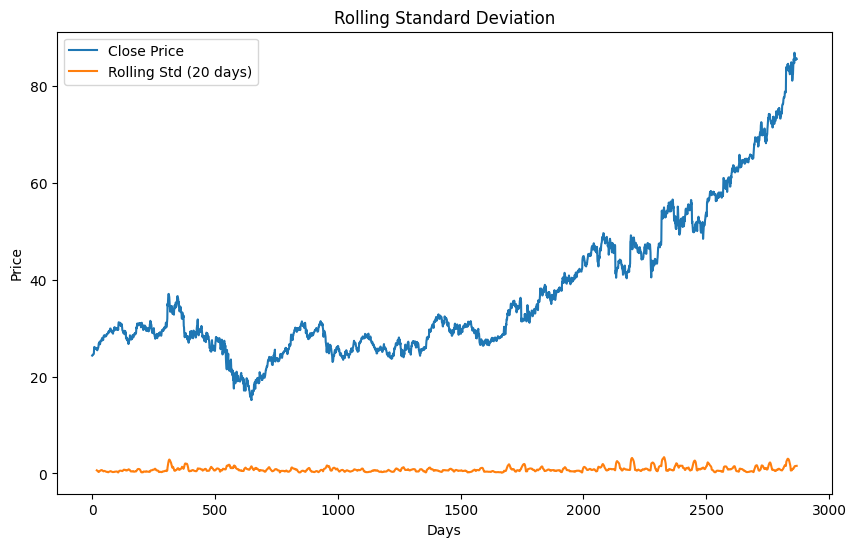

In [348]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data_set.TargetNextClose, label='Close Price')
ax.plot(data_set.TargetNextClose.rolling(window=20).std(), label='Rolling Std (20 days)')
ax.set_xlabel('Days')
ax.set_ylabel('Price')
ax.legend()
plt.title('Rolling Standard Deviation')
plt.show()


In [349]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.12625139 0.12326099 0.13060538 ... 0.55016722 0.         0.12817294]
 [0.12778087 0.12381747 0.13074552 ... 0.55016722 0.         0.12956764]
 [0.1291713  0.12548692 0.1327074  ... 0.5735786  1.         0.12984658]
 ...
 [0.97483315 0.97259321 0.98318386 ... 0.56856187 1.         0.98410042]
 [0.97956062 0.97885364 0.98584641 ... 0.52842809 0.         0.98423989]
 [0.98303671 0.97815804 0.99047085 ... 0.54347826 0.         0.98172943]]


In [350]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 7
print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-3])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

2869
[[[0.12625139 0.12326099 0.13060538 ... 0.08706426 0.0894977  0.55016722]
  [0.12778087 0.12381747 0.13074552 ... 0.08705353 0.08928674 0.55016722]
  [0.1291713  0.12548692 0.1327074  ... 0.08707567 0.08910182 0.5735786 ]
  ...
  [0.12833704 0.12284363 0.13074552 ... 0.08712179 0.08874154 0.56020067]
  [0.12958843 0.12493044 0.13284753 ... 0.08717198 0.08858475 0.57023411]
  [0.13000556 0.12562604 0.13410874 ... 0.08725057 0.08845095 0.5735786 ]]

 [[0.12778087 0.12381747 0.13074552 ... 0.08705353 0.08928674 0.55016722]
  [0.1291713  0.12548692 0.1327074  ... 0.08707567 0.08910182 0.5735786 ]
  [0.12750278 0.12493044 0.1327074  ... 0.08710391 0.08892399 0.55852843]
  ...
  [0.12958843 0.12493044 0.13284753 ... 0.08717198 0.08858475 0.57023411]
  [0.13000556 0.12562604 0.13410874 ... 0.08725057 0.08845095 0.5735786 ]
  [0.13083982 0.12673901 0.13452915 ... 0.08735374 0.08833751 0.55852843]]

 [[0.1291713  0.12548692 0.1327074  ... 0.08707567 0.08910182 0.5735786 ]
  [0.12750278 0.1

In [351]:
#also comprehensions for X
#X = np.array([data_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(data_set_scaled))])
#print(X)
#print(X.shape)

In [352]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

2289
(2289, 7, 8)
(573, 7, 8)
(2289, 1)
(573, 1)
[[0.55852843]
 [0.68227425]
 [0.63545151]
 ...
 [0.55518395]
 [0.64046823]
 [0.64548495]]


In [353]:
import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout
from keras import optimizers
from kerastuner import HyperParameters
from kerastuner.engine.hyperparameters import HyperParameters
from kerastuner.tuners import RandomSearch

# Define the model-building function
def build_model(hp):
  model = Sequential()
  model.add(LSTM(units=hp.Int('units', min_value=32, max_value=288, step=32),
                activation='relu', input_shape=(backcandles, 8)))
  model.add(Dropout(rate=hp.Float('dropout', min_value=0.3, max_value=0.7, step=0.1)))
  model.add(Dense(units=hp.Int('dense_units', min_value=0, max_value=100, step=10), activation='relu'))
  model.add(Dense(1))
  model.compile(loss='mse', metrics=['mse'], optimizer=keras.optimizers.Adam(
      hp.Choice('learning_rate', values=[1e-2, 1e-3])))
  return model

# Instantiate the tuner
tuner = RandomSearch(
 build_model,
 objective='val_mse',
 max_trials=20,
 executions_per_trial=2,
 directory='Tuners',
 project_name='Tuner')

# Run the hyperparameter search
tuner.search(X_train, y_train, epochs=30, validation_split=0.1)

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Train the model with the optimal hyperparameters
model = tuner.get_best_models(num_models=1)[0]
history = model.fit(X_train, y_train, epochs=30, validation_split=0.1)


Reloading Tuner from Tuners/Tuner/tuner0.json
Epoch 1/30
65/65 [==============================] - 3s 15ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 2/30
65/65 [==============================] - 1s 13ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 3/30
65/65 [==============================] - 1s 12ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 4/30
65/65 [==============================] - 1s 11ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0092 - val_mse: 0.0092
Epoch 5/30
65/65 [==============================] - 1s 12ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 6/30
65/65 [==============================] - 1s 13ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 7/30
65/65 [==============================] - 1s 19ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 8/30
65/65 [===================

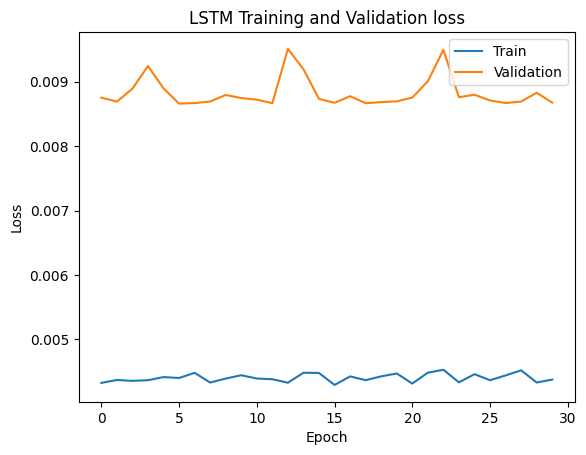

In [354]:

import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LSTM Training and Validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [355]:
print(best_hps.values)

{'units': 32, 'dropout': 0.5, 'dense_units': 40, 'learning_rate': 0.01}


In [356]:
tuner.results_summary(num_trials=20)

Results summary
Results in Tuners/Tuner
Showing 20 best trials
Objective(name="val_mse", direction="min")

Trial 03 summary
Hyperparameters:
units: 32
dropout: 0.5
dense_units: 40
learning_rate: 0.01
Score: 0.008645009715110064

Trial 13 summary
Hyperparameters:
units: 32
dropout: 0.6000000000000001
dense_units: 20
learning_rate: 0.001
Score: 0.008645357564091682

Trial 01 summary
Hyperparameters:
units: 64
dropout: 0.4
dense_units: 80
learning_rate: 0.001
Score: 0.008649190422147512

Trial 09 summary
Hyperparameters:
units: 64
dropout: 0.4
dense_units: 60
learning_rate: 0.001
Score: 0.008657589089125395

Trial 08 summary
Hyperparameters:
units: 96
dropout: 0.6000000000000001
dense_units: 10
learning_rate: 0.01
Score: 0.008659274317324162

Trial 11 summary
Hyperparameters:
units: 160
dropout: 0.6000000000000001
dense_units: 20
learning_rate: 0.01
Score: 0.008660444989800453

Trial 16 summary
Hyperparameters:
units: 288
dropout: 0.6000000000000001
dense_units: 40
learning_rate: 0.001
Sc

In [357]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

18/18 [==============================] - 1s 7ms/step
[0.55858505] [0.54849498]
[0.558523] [0.63545151]
[0.55854833] [0.46822742]
[0.55849046] [0.46822742]
[0.5584764] [0.57023411]
[0.55897385] [0.62207358]
[0.5591711] [0.53511706]
[0.55873036] [0.77591973]
[0.5584141] [0.70735786]
[0.5581696] [0.62876254]


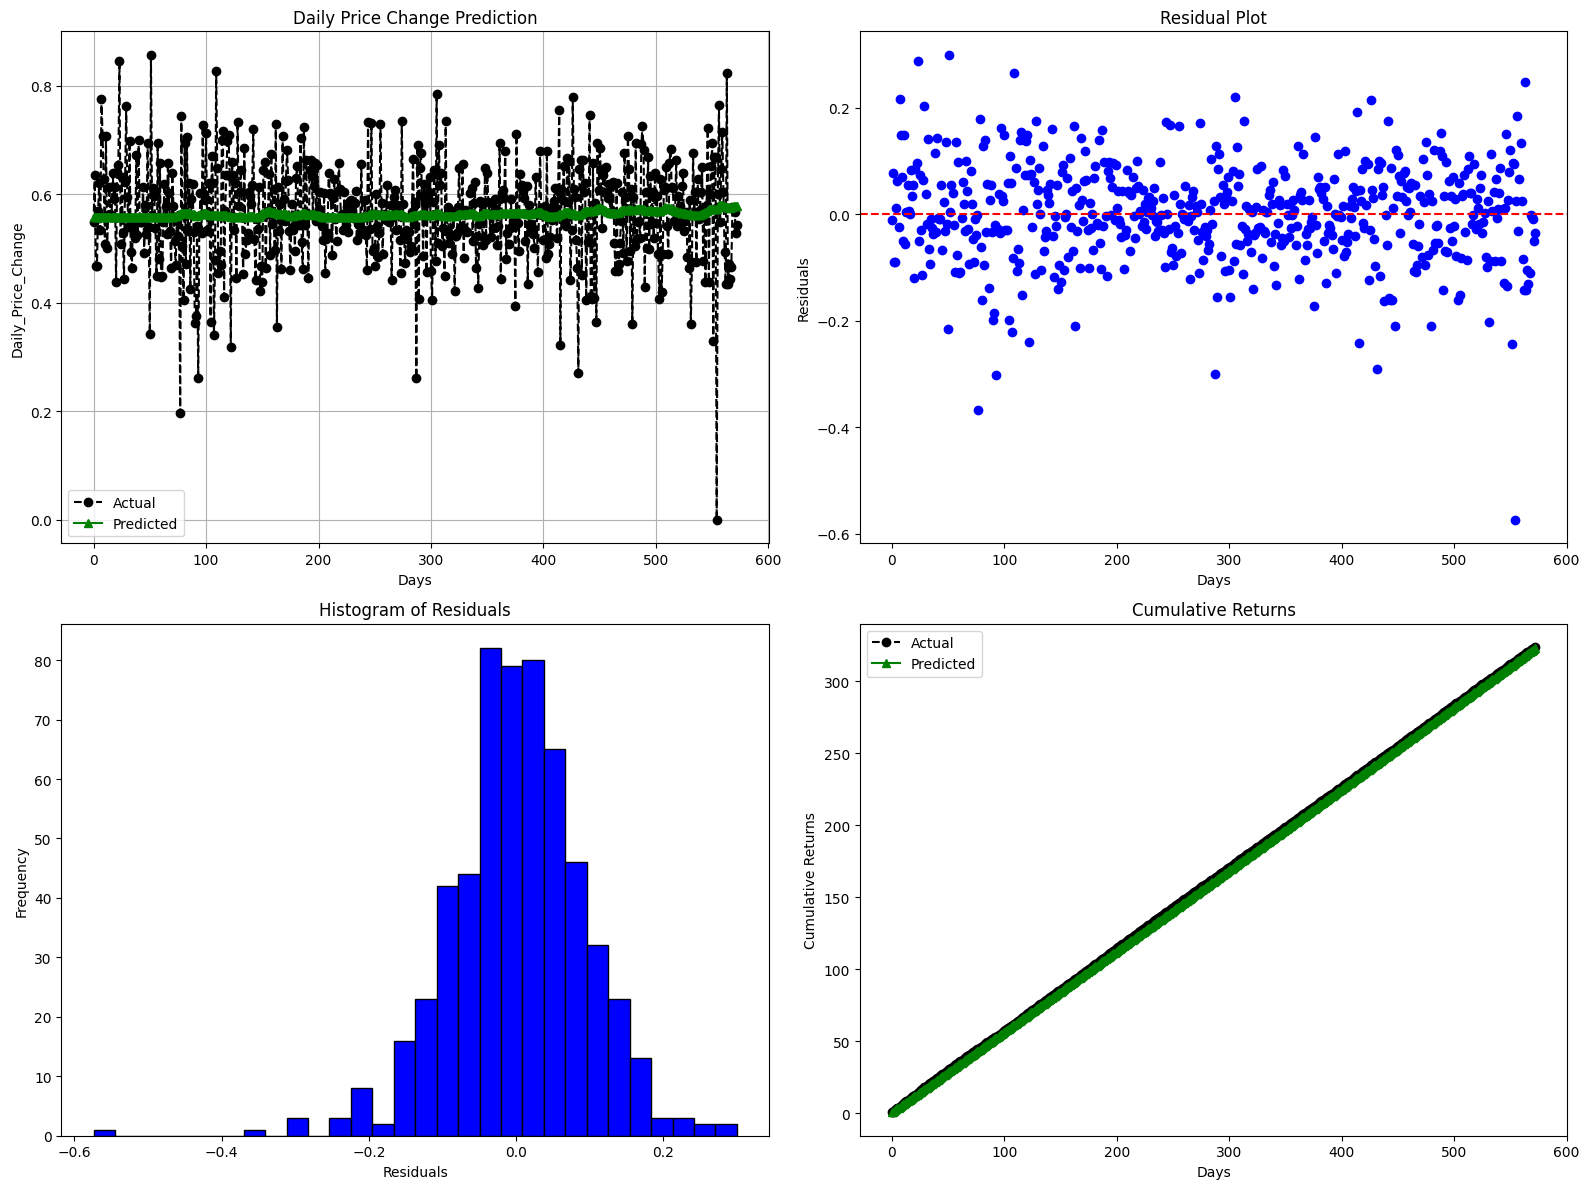

In [358]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming y_test and y_pred are NumPy arrays or lists
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

residuals = y_test - y_pred

# Create a 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Actual vs. Predicted
axs[0, 0].plot(y_test, color='black', label='Actual', linestyle='--', marker='o')
axs[0, 0].plot(y_pred, color='green', label='Predicted', linestyle='-', marker='^')
axs[0, 0].set_title('Daily Price Change Prediction')
axs[0, 0].set_ylabel('Daily_Price_Change')
axs[0, 0].set_xlabel('Days')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Plot 2: Residual Plot
axs[0, 1].plot(residuals, color='blue', linestyle='', marker='o')
axs[0, 1].axhline(y=0, color='red', linestyle='--')
axs[0, 1].set_title('Residual Plot')
axs[0, 1].set_xlabel('Days')
axs[0, 1].set_ylabel('Residuals')

# Plot 3: Histogram of Residuals
axs[1, 0].hist(residuals, bins=30, color='blue', edgecolor='black')
axs[1, 0].set_title('Histogram of Residuals')
axs[1, 0].set_xlabel('Residuals')
axs[1, 0].set_ylabel('Frequency')

# Plot 4: Cumulative Returns
cumulative_returns_actual = np.cumsum(y_test)
cumulative_returns_pred = np.cumsum(y_pred)

axs[1, 1].plot(cumulative_returns_actual, label='Actual', color='black', linestyle='--', marker='o')
axs[1, 1].plot(cumulative_returns_pred, label='Predicted', color='green', linestyle='-', marker='^')
axs[1, 1].set_title('Cumulative Returns')
axs[1, 1].set_xlabel('Days')
axs[1, 1].set_ylabel('Cumulative Returns')
axs[1, 1].legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()
